## Product purchase prediction using Logistic Regression

### INTRODUCTION

This dataset includes whether people buy a product based on their age, gender, and estimated annual salary.

I will try to predict whether they bought it using the Logistic Regression method.

### CONTENTS

#### import relevant Python Libraries
#### Data analysis (EDA)
#### check Data Distributions
#### Correlation
#### Logistic Regression
###### -Prepare Data
###### -split the data into training set and testing set 
###### -create the regression
#### confusion Matrix
#### Test the model
#### Conclusion

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns
from collections import Counter
import statsmodels.api as sm

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


#### check for missing value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# descriptive staistics
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Data Distribution

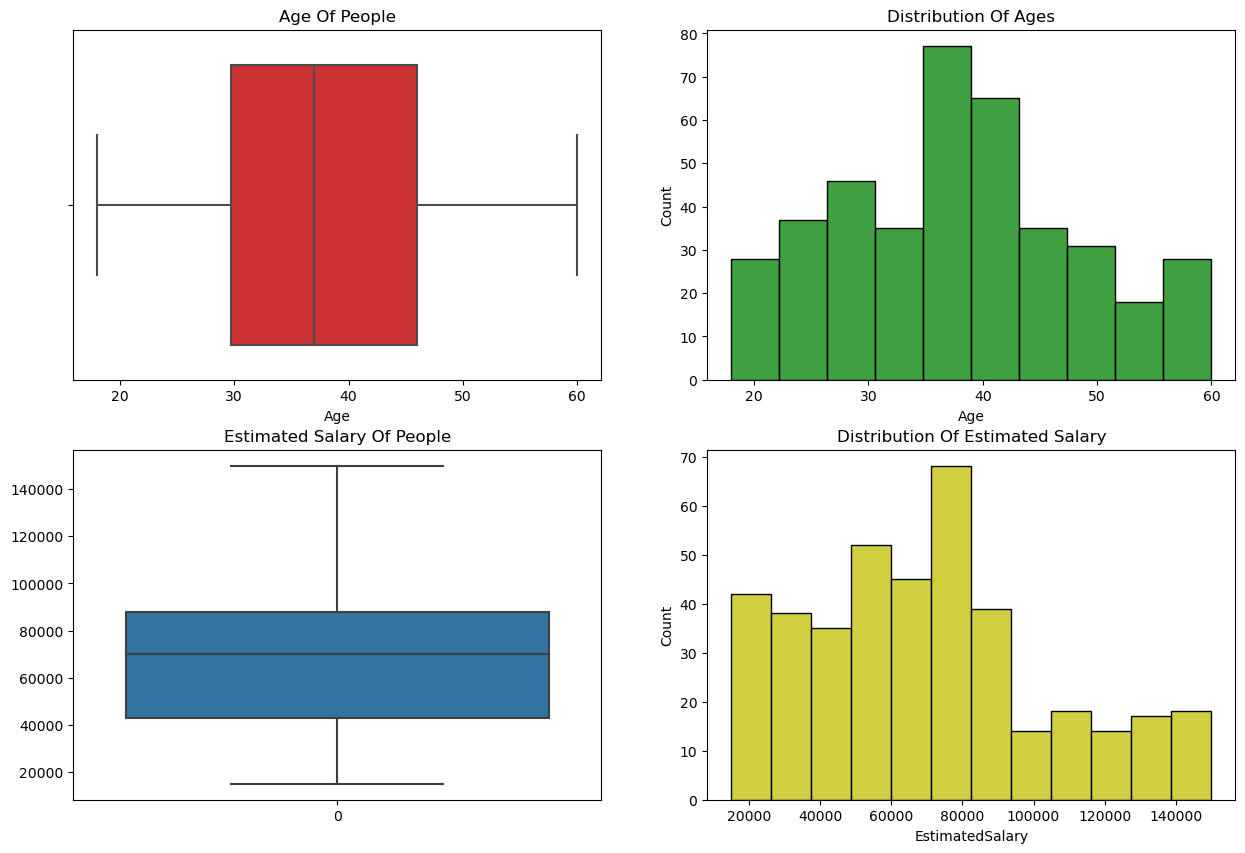

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= data['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')
sns.histplot(ax=axes[0,1],x='Age',data=df,color="g")
axes[0,1].set_title('Distribution Of Ages')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df,color="y")
axes[1,1].set_title('Distribution Of Estimated Salary')
plt.show()

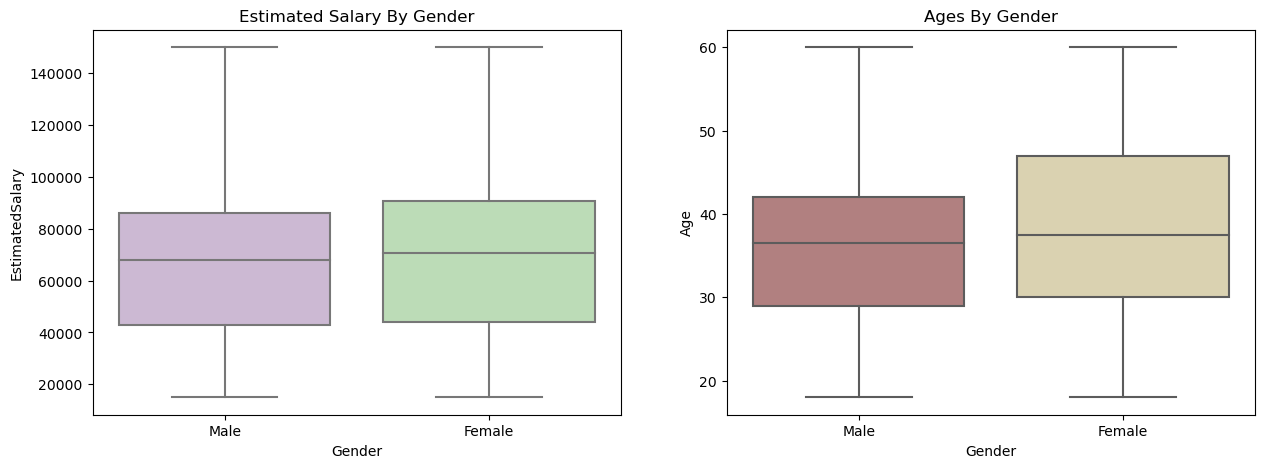

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

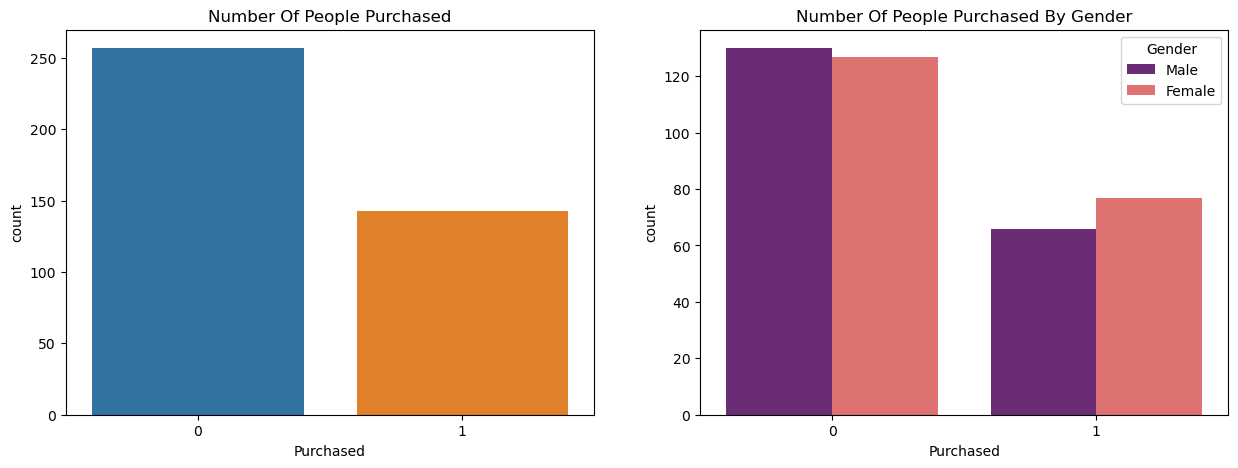

In [73]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

### Correlation

In [74]:
df.corr()

C:\Users\SANI\AppData\Local\Temp\ipykernel_3028\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


C:\Users\SANI\AppData\Local\Temp\ipykernel_3028\3639848199.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)


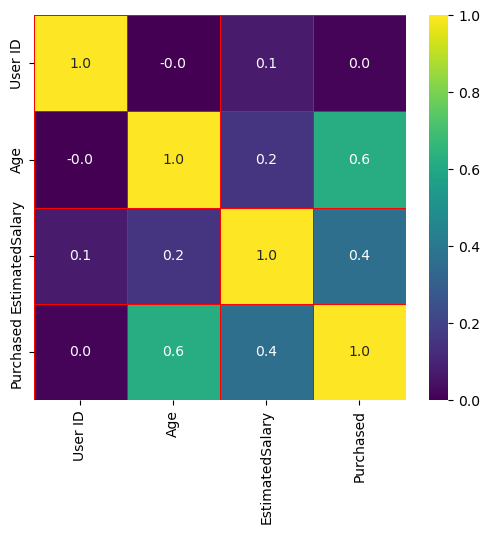

In [75]:
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

### Logistic Regression

#### Prepare Data

In [54]:
#drop unnessary variable
# the user_id is not needed fro analysis
df.drop('User ID',axis = 1, inplace = True)

 Now we'll perform the regression using logistic regression.
 To ensure accuracy of the model.
 I will split the dataset into two in the ratio 80/20 using the train_test split function from sklearn. 
 1. the training data (df_train)
 2.the testing data (df_test)


#### split data into Training set and -Testing set

In [104]:
#Import the module for the split
from sklearn.model_selection import train_test_split

#Split the variables with an 80-20 split and some random state

x_train, x_test, = train_test_split(df, test_size=0.2, random_state=365)
#a_train, a_test, = train_test_split(a, test_size=0.2, random_state=365)

In [105]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 388 to 82
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           320 non-null    object
 1   Age              320 non-null    int64 
 2   EstimatedSalary  320 non-null    int64 
 3   Purchased        320 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.5+ KB


In [106]:
# i have to save the splitted data to a csv file then read it in again
x_train.to_csv('Social_Network_Ads_Train',index = False)

In [107]:
df_train = pd.read_csv('Social_Network_Ads_Train')
#map the categorical variables
df_train['Gender'] =df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train

,Gender,Age,EstimatedSalary,Purchased
0,1,47,34000,1
1,1,32,18000,0
2,0,46,96000,0
3,1,42,80000,0
4,1,38,71000,0
...,...,...,...,...
315,1,36,144000,1
316,0,54,108000,1
317,0,37,78000,1
318,1,26,16000,0


##### Create the regression

##### Declare the dependent and independent variables

In [108]:
# all the variables except the purchsed variable are the independent variable
estimators=['Gender','Age','EstimatedSalary']

x1_all = df_train[estimators]
# the variable purchased is the dependent variable
y = df_train['Purchased']

In [109]:
x_all = sm.add_constant(x1_all)
reg_logit = sm.Logit(y,x_all)
results_logit = reg_logit.fit()
#create a summary table
results_logit.summary()



Optimization terminated successfully.
         Current function value: 0.327195
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Dec 2023   Pseudo R-squ.:                  0.5030
Time:                        11:13:48   Log-Likelihood:                -104.70
converged:                       True   LL-Null:                       -210.65
Covariance Type:            nonrobust   LLR p-value:                 1.132e-45
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -13.8095      1.689     -8.178      0.000     -17.119     -10.500
Gender              0.0194      0.347      0.056      0.955      -0.660       0.699
Age                 0.2574      0.033      7.824      0.000       0.193       0.322
EstimatedSalary  4.214e-05   6.78e-06      6.211      0.000    2.88e-05    5.54e-05
===================================================================================
"""

## Confusion Matrix

find the confusion Matrix of the model and find its accuracy

In [110]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [111]:
cm=confusion_matrix(x_all,y,results_logit)
cm

(array([[187.,  15.],
        [ 31.,  87.]]),
 0.85625)

the accuracy is 85.6%

## Test the model

load new data(df_test)

In [112]:
# i have to save the splitted data to a csv file then read it in again

x_test.to_csv('Social_Network_Ads_Test',index = False)

In [113]:
df_test = pd.read_csv('Social_Network_Ads_Test')
#map the categorical variables to avoid error in the regression
df_test['Gender'] =df_test['Gender'].map({'Male': 1, 'Female': 0})
df_test

,Gender,Age,EstimatedSalary,Purchased
0,1,47,105000,1
1,1,30,80000,0
2,0,41,30000,0
3,0,36,50000,0
4,0,31,89000,0
...,...,...,...,...
75,1,59,143000,1
76,1,40,107000,1
77,0,31,15000,0
78,0,46,82000,0


### Declare the dependent and the independent variables

In [114]:
y_test = df_test['Purchased']
# We already declared a list called 'estimators' that holds all relevant estimators for our model. 
x1_test = df_test[estimators]
x_test = sm.add_constant(x1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [115]:
# Determine the Confusion Matrix and the accuracy of the model with the new data. Note that the model itself stays the same (results_logit).
# test accuracy
confusion_matrix(x_test, y_test, results_logit)


(array([[48.,  7.],
        [ 8., 17.]]),
 0.8125)

the accuracy of the test is 81.3%

In [116]:
#present the matrix in a datafrme
cm_df = pd.DataFrame(cm[0])
cm_df.columns=['predicted 0', 'predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1 :'Actual 1'})
cm_df

,predicted 0,predicted 1
Actual 0,187.0,15.0
Actual 1,31.0,87.0


###### Test accuracy: 0.8125
###### Train accuracy: 0.8562

## Conclusion

we conclude that by the model, 81.3% of the customers actually bought the products based on their Gender,Ageand estimated salary

As a result, we achieved 81.3 percent accuracy. This rate can be increased by changing some parameters.
kindly give feedbacks and comments. 
Thank you